In [1]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'

In [2]:
import parameters as params
from parameters import *
from MM_Traj_Utils import *
from MM_Maze_Utils import NewMaze
from MM_Plot_Utils import *
from plot_utils import plot_nodes_vs_time, plot_maze_stats, plot_trajectory
from utils import get_parent_node

In [3]:
from utils import convert_episodes_to_traj_class, convert_traj_to_episodes

In [4]:
from collections import defaultdict

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline

In [7]:
ma = NewMaze(6)

In [8]:
# plot empty maze
# PlotMazeFunction([0 for i in range(127)],ma,mode='nodes',numcol='green', figsize=6);

### Nodes from where mice reach the center (node 0) by the direct path?

B5


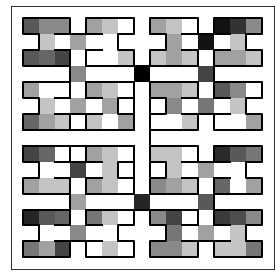

B6


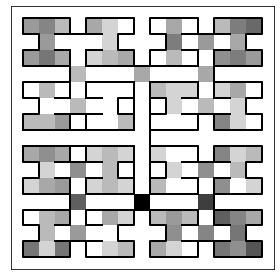

B7


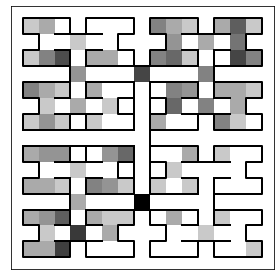

D3


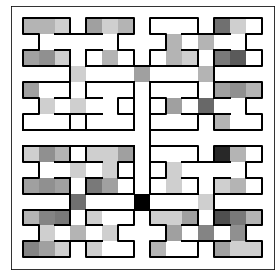

D4


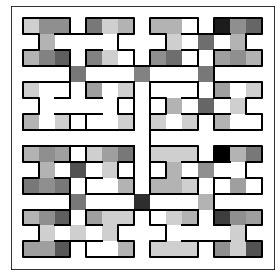

D5


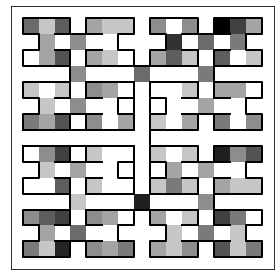

D7


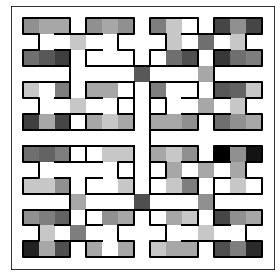

D8


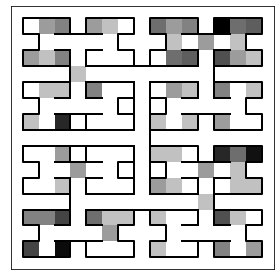

D9


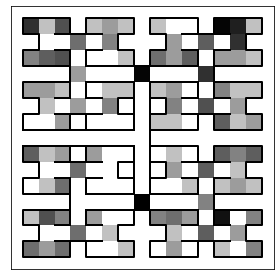

In [9]:
to_node=0
for sub in params.UnrewNamesSub:
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
    hr=FindPathsToAnyNode(to_node,tf,ma)
    fr,_=np.histogram(hr[:,1],bins=np.arange(2**(ma.le+1))-0.5)
    fr=np.log(fr+1)/np.log(np.max(fr+1))
    print(sub)
    PlotMazeFunction(fr,ma,mode='nodes',numcol=None,figsize=4,col=None);
    plt.show()

B5


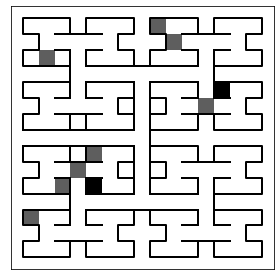

B6


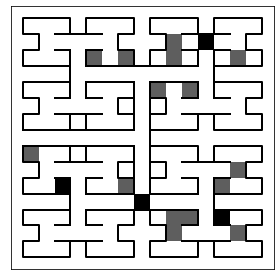

B7


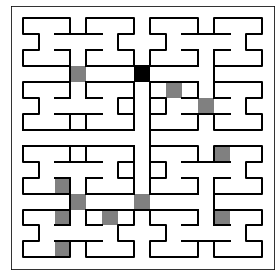

D3


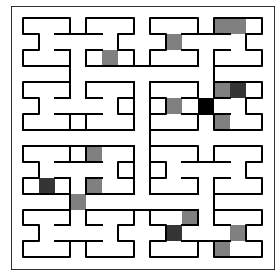

D4


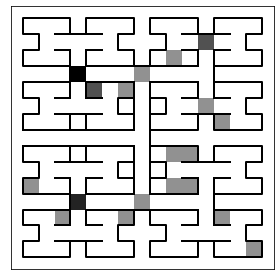

D5


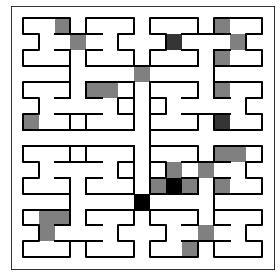

D7


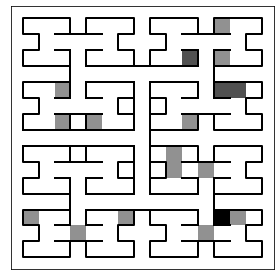

D8


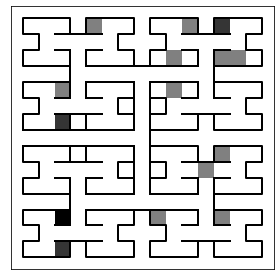

D9


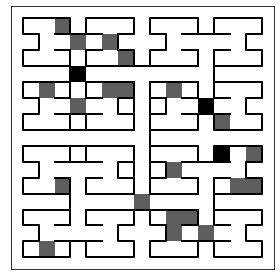

In [10]:
# Same as above, but looking at only first 10 episodes
to_node=0
for sub in params.UnrewNamesSub:
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
    epi = convert_traj_to_episodes(tf)[:10]
    tf = convert_episodes_to_traj_class(epi)
    hr=FindPathsToAnyNode(to_node,tf,ma)
    fr,_=np.histogram(hr[:,1],bins=np.arange(2**(ma.le+1))-0.5)
    fr=np.log(fr+1)/np.log(np.max(fr+1))
    print(sub)
    PlotMazeFunction(fr,ma,mode='nodes',numcol=None,figsize=4,col=None);
    plt.show()

## Analyzing the 4 nodes in a subquadrant when reached from parent level 3 or level 4 opp node

In [10]:
# define node numbers of all nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [12]:
def _count_query_paths_fixed_len(tf, query_paths):
    query_path_counts = dict.fromkeys(query_paths, 0)
    
    fixed_len = len(query_paths[0])
    # all query path lengths have to be same
    assert sum([fixed_len-len(p) for p in query_paths]) == 0

    for i, bout in enumerate(tf.no):
        path = [node for node, _ in bout]
        for j in range(len(path)):
            curr_path = tuple(path[j:j+fixed_len])
            if len(curr_path) < fixed_len:
                break
            if curr_path in query_paths:
#                 print(curr_path, j)
                query_path_counts[curr_path] += 1
    return query_path_counts

In [13]:
def _count_total_visits(tf, node):
    count = np.sum([np.count_nonzero(t[:, 0] == node) for t in tf.no])
    return count

In [35]:
def levelup_path(n, go_up):
    path = [n]
    while go_up:
        if n % 2 == 0:
            n -= 1
        n = n // 2
        go_up -= 1
        path.append(n)
    return tuple(path[::-1])

def level4_opp_path(n, go_up):
    path = list(levelup_path(n, go_up=go_up))
    print(path)
    last_level4_node = path[1]
    if last_level4_node%2 == 1:
        path.insert(0, last_level4_node+1)
    else:
        path.insert(0, last_level4_node-1)
    return tuple(path)

def level5_opp_path(n, go_up, child):
    path = list(levelup_path(n, go_up=go_up))
    print(path)
    last_level4_node = path[1]
    if last_level4_node%2 == 1:
        path.insert(0, last_level4_node+1)
    else:
        path.insert(0, last_level4_node-1)
    lv4_node = path[0]
    
    return tuple([lv4_node*2 + child] + path)

node_set (63, 65)
[7, 15, 31, 63]
[7, 15, 32, 65]
query_paths [(33, 16, 7, 15, 31, 63), (33, 16, 7, 15, 32, 65)]
B5
{(33, 16, 7, 15, 31, 63): 2, (33, 16, 7, 15, 32, 65): 1}
subject B5 skipped
B6
{(33, 16, 7, 15, 31, 63): 2, (33, 16, 7, 15, 32, 65): 0}
subject B6 skipped
B7
{(33, 16, 7, 15, 31, 63): 0, (33, 16, 7, 15, 32, 65): 2}
subject B7 skipped
D3
{(33, 16, 7, 15, 31, 63): 0, (33, 16, 7, 15, 32, 65): 2}
subject D3 skipped
D4
{(33, 16, 7, 15, 31, 63): 0, (33, 16, 7, 15, 32, 65): 2}
subject D4 skipped
D5
{(33, 16, 7, 15, 31, 63): 4, (33, 16, 7, 15, 32, 65): 1}
subject D5 skipped
D7
{(33, 16, 7, 15, 31, 63): 5, (33, 16, 7, 15, 32, 65): 2}
subject D7 skipped
D8
{(33, 16, 7, 15, 31, 63): 6, (33, 16, 7, 15, 32, 65): 7}
D9
{(33, 16, 7, 15, 31, 63): 2, (33, 16, 7, 15, 32, 65): 1}
subject D9 skipped
node_set (68, 70)
[7, 16, 33, 68]
[7, 16, 34, 70]
query_paths [(31, 15, 7, 16, 33, 68), (31, 15, 7, 16, 34, 70)]
B5
{(31, 15, 7, 16, 33, 68): 2, (31, 15, 7, 16, 34, 70): 0}
subject B5 skipped
B6


{(45, 22, 10, 21, 44, 89): 2, (45, 22, 10, 21, 43, 87): 0}
subject B6 skipped
B7
{(45, 22, 10, 21, 44, 89): 5, (45, 22, 10, 21, 43, 87): 2}
subject B7 skipped
D3
{(45, 22, 10, 21, 44, 89): 0, (45, 22, 10, 21, 43, 87): 0}
subject D3 skipped
D4
{(45, 22, 10, 21, 44, 89): 2, (45, 22, 10, 21, 43, 87): 3}
subject D4 skipped
D5
{(45, 22, 10, 21, 44, 89): 2, (45, 22, 10, 21, 43, 87): 4}
subject D5 skipped
D7
{(45, 22, 10, 21, 44, 89): 5, (45, 22, 10, 21, 43, 87): 0}
subject D7 skipped
D8
{(45, 22, 10, 21, 44, 89): 4, (45, 22, 10, 21, 43, 87): 2}
subject D8 skipped
D9
{(45, 22, 10, 21, 44, 89): 2, (45, 22, 10, 21, 43, 87): 2}
subject D9 skipped
node_set (94, 92)
[10, 22, 46, 94]
[10, 22, 45, 92]
query_paths [(43, 21, 10, 22, 46, 94), (43, 21, 10, 22, 45, 92)]
B5
{(43, 21, 10, 22, 46, 94): 1, (43, 21, 10, 22, 45, 92): 1}
subject B5 skipped
B6
{(43, 21, 10, 22, 46, 94): 0, (43, 21, 10, 22, 45, 92): 0}
subject B6 skipped
B7
{(43, 21, 10, 22, 46, 94): 1, (43, 21, 10, 22, 45, 92): 0}
subject B7 ski

{(48, 23, 11, 24, 49, 100): 6, (48, 23, 11, 24, 50, 102): 1}
subject D4 skipped
D5
{(48, 23, 11, 24, 49, 100): 3, (48, 23, 11, 24, 50, 102): 1}
subject D5 skipped
D7
{(48, 23, 11, 24, 49, 100): 0, (48, 23, 11, 24, 50, 102): 1}
subject D7 skipped
D8
{(48, 23, 11, 24, 49, 100): 5, (48, 23, 11, 24, 50, 102): 1}
subject D8 skipped
D9
{(48, 23, 11, 24, 49, 100): 0, (48, 23, 11, 24, 50, 102): 0}
subject D9 skipped
node_set (105, 103)
[12, 25, 52, 105]
[12, 25, 51, 103]
query_paths [(54, 26, 12, 25, 52, 105), (54, 26, 12, 25, 51, 103)]
B5
{(54, 26, 12, 25, 52, 105): 0, (54, 26, 12, 25, 51, 103): 0}
subject B5 skipped
B6
{(54, 26, 12, 25, 52, 105): 4, (54, 26, 12, 25, 51, 103): 3}
subject B6 skipped
B7
{(54, 26, 12, 25, 52, 105): 0, (54, 26, 12, 25, 51, 103): 0}
subject B7 skipped
D3
{(54, 26, 12, 25, 52, 105): 0, (54, 26, 12, 25, 51, 103): 0}
subject D3 skipped
D4
{(54, 26, 12, 25, 52, 105): 1, (54, 26, 12, 25, 51, 103): 1}
subject D4 skipped
D5
{(54, 26, 12, 25, 52, 105): 11, (54, 26, 12, 25

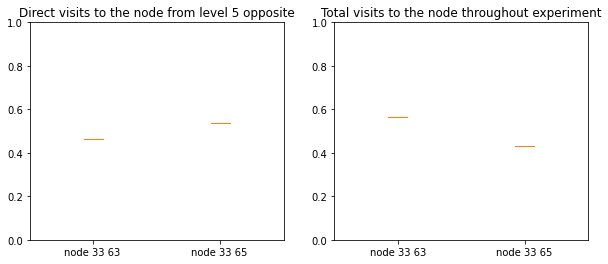

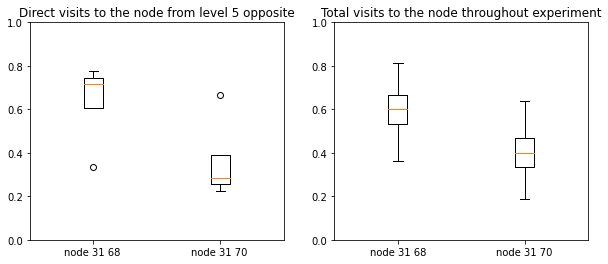

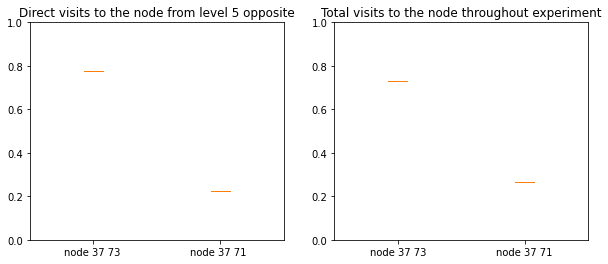

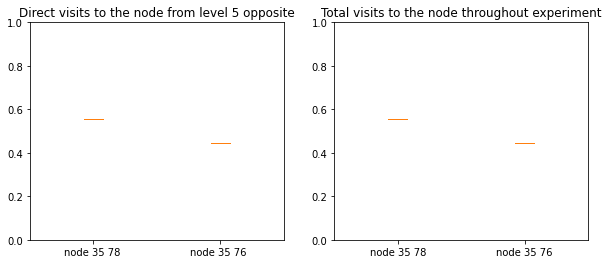

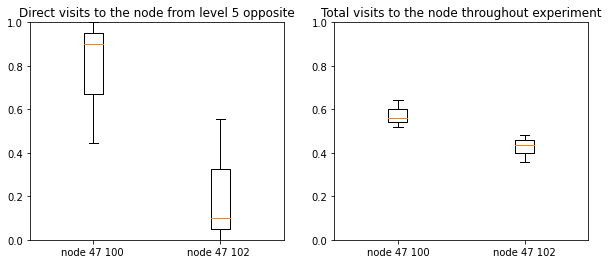

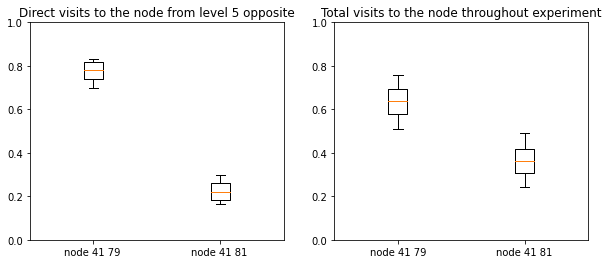

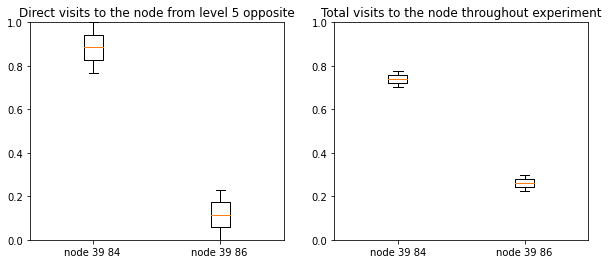

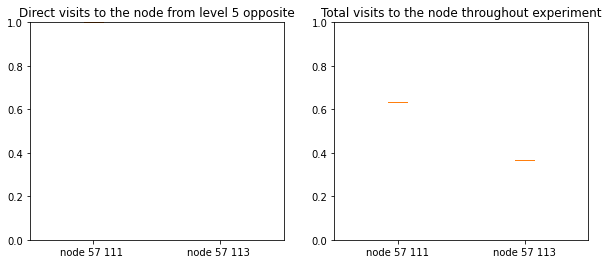

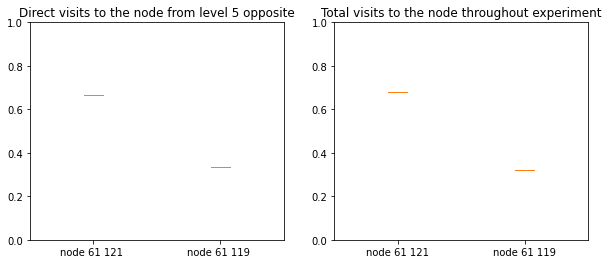

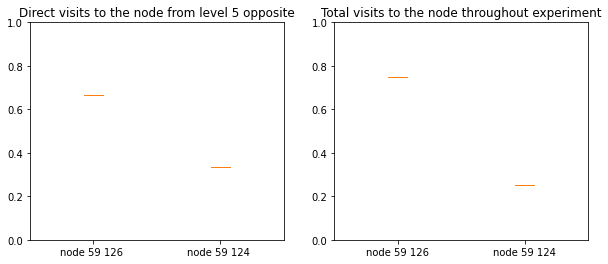

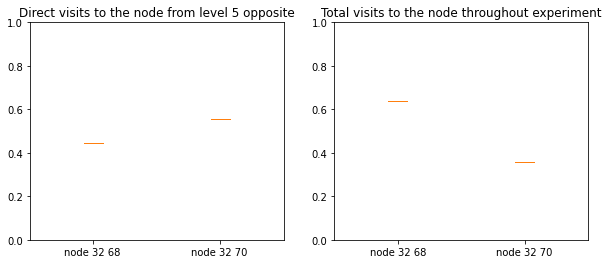

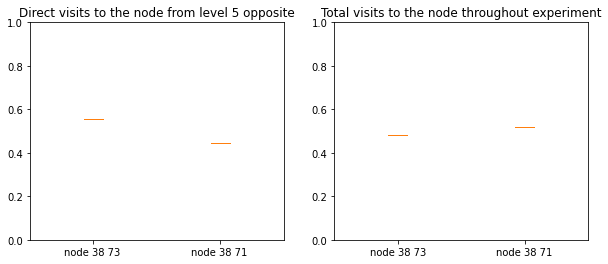

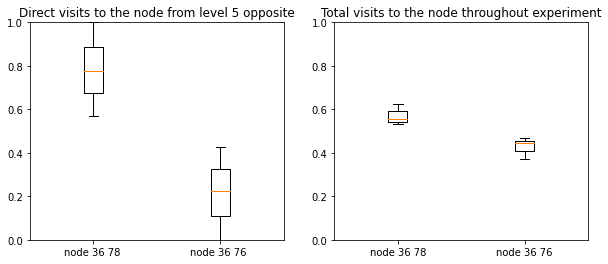

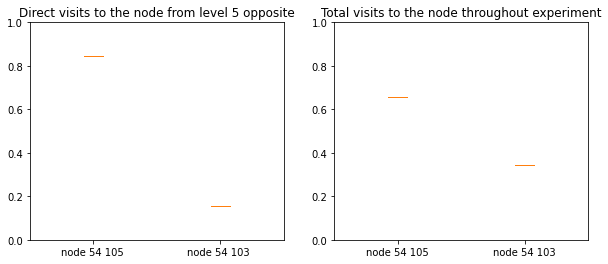

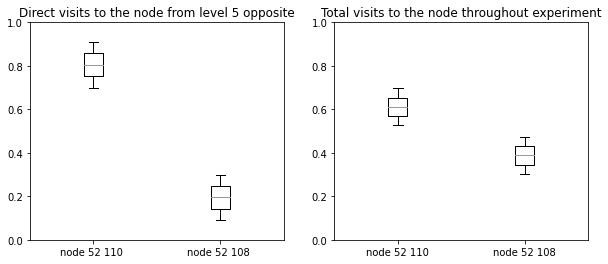

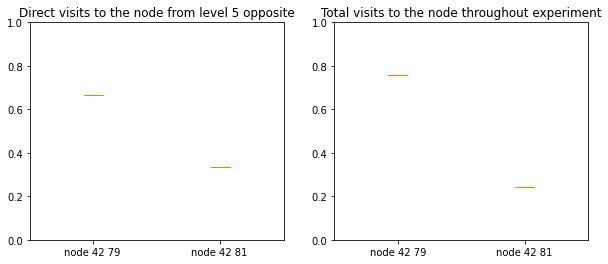

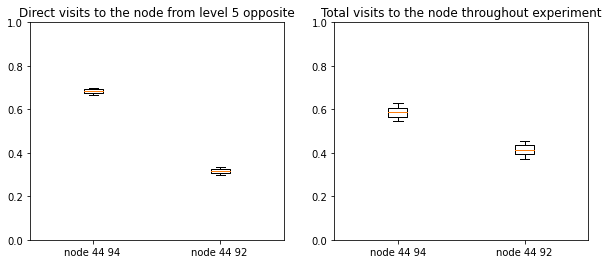

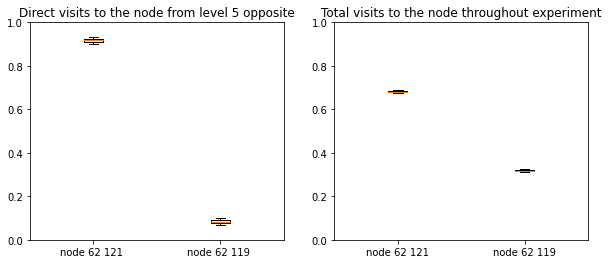

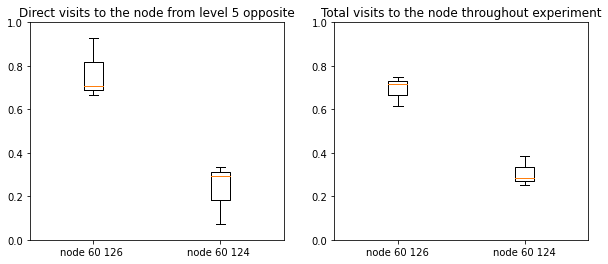

In [53]:
node_sets = [
    (63, 65, 64, 66),
    (68, 70, 67, 69),
    (73, 71, 74, 72),
    (78, 76, 77, 75),
    (95, 97, 96, 98),
    (100, 102, 99, 101),
    (105, 103, 106, 104),
    (110, 108, 109, 107),
    (79, 81, 80, 82),
    (84, 86, 83, 85),
    (89, 87, 90, 88),
    (94, 92, 93, 91),
    (111, 113, 112, 114),
#     (116, 118, 115, 117),
    (121, 119, 122, 120),
    (126, 124, 125, 123),
]

node_pairs = [(n[0], n[1]) for n in node_sets]

all_node_set_counts = []
animals = params.UnrewNamesSub
for child in [1, 2]:
    for node_set in node_pairs:
    #     assert abs(n1-n2) == 2
    #     n1, n2, n3, n4 = node_set
    #     node_set = tuple([parent_node(n) for n in node_set])
    #     node_set = node_set[:2]
        print("node_set", node_set)
    #     query_paths = [levelup_path(n, go_up=3) for n in node_set]
        query_paths = []
        for n in node_set:
            query_paths.append(level5_opp_path(n, go_up=3, child=child))

    #     for n in node_set:
    #         query_paths.append(level4_opp_path(n, go_up=3))

        print("query_paths", query_paths)
        node_set_path_counts = []
        node_set_total_counts = []
        for sub in animals:
            print(sub)
            tf = LoadTrajFromPath(outdata_path + sub + '-tf')
            path_count = _count_query_paths_fixed_len(tf, query_paths)
            print(path_count)
            total_count = dict([(n, _count_total_visits(tf, n)) for n in node_set])
    #         print(total_count)
            all_path_count = sum(path_count.values())
            if all_path_count <= 8:
                print(f'subject {sub} skipped')
                continue
            all_total_count = sum(total_count.values())
            node_set_path_counts.append([path_count[p]/all_path_count for p in query_paths])
            node_set_total_counts.append([total_count[n]/all_total_count for n in node_set])
            all_node_set_counts.append(node_set_path_counts[-1] + node_set_total_counts[-1])

        if len(node_set_path_counts) <= 0: # no data for this node-pair
            continue

        node_set_path_counts = np.array(node_set_path_counts)
        node_set_total_counts = np.array(node_set_total_counts)
    #     all_node_set_counts.append(np.nanmean(node_set_path_counts, axis=0).tolist() + np.nanmean(node_set_total_counts, axis=0).tolist())
        plt.figure(figsize=(10, 4))
        ax1 = plt.subplot(121)
        ax1.boxplot(node_set_path_counts)
        ax1.set_ylim([0, 1])
    #     ax1.set_title('Direct visits to the node from level 3')
        ax1.set_title('Direct visits to the node from level 5 opposite')
        ax1.set_xticklabels([f'node {p[0]} {p[-1]} ' for p in query_paths])

        ax2 = plt.subplot(122)
        ax2.boxplot(node_set_total_counts)
        ax2.set_ylim([0, 1])
        ax2.set_title('Total visits to the node throughout experiment')
        ax2.set_xticklabels([f'node {p[0]} {p[-1]}' for p in query_paths])
#         plt.show()
    #     print(all_node_set_counts)


(35, 4) ==================
[[0.46153846 0.53846154 0.56647399 0.43352601]
 [0.77777778 0.22222222 0.59016393 0.40983607]
 [0.73333333 0.26666667 0.36363636 0.63636364]
 [0.33333333 0.66666667 0.61445783 0.38554217]
 [0.7        0.3        0.81318681 0.18681319]
 [0.77777778 0.22222222 0.73248408 0.26751592]
 [0.55555556 0.44444444 0.55555556 0.44444444]
 [1.         0.         0.64285714 0.35714286]
 [0.9        0.1        0.56179775 0.43820225]
 [0.44444444 0.55555556 0.51968504 0.48031496]
 [0.8125     0.1875     0.67088608 0.32911392]
 [0.7        0.3        0.50746269 0.49253731]
 [0.83333333 0.16666667 0.60504202 0.39495798]
 [0.75       0.25       0.7578125  0.2421875 ]
 [1.         0.         0.77653631 0.22346369]
 [0.76923077 0.23076923 0.70285714 0.29714286]
 [1.         0.         0.63333333 0.36666667]
 [0.66666667 0.33333333 0.67857143 0.32142857]
 [0.66666667 0.33333333 0.74752475 0.25247525]
 [0.44444444 0.55555556 0.64044944 0.35955056]
 [0.55555556 0.44444444 0.4809160

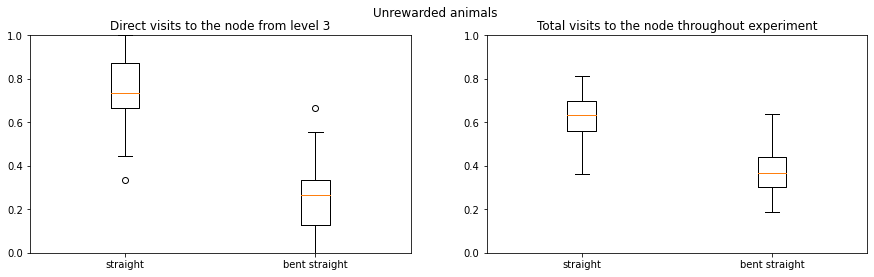

In [55]:
# Averaging them with a general terminology to characterize all 4 subquadrant nodes in each subquadrant
# print(all_node_set_counts)
all_node_set_counts = np.array(all_node_set_counts)
print(all_node_set_counts.shape, "==================")
print(all_node_set_counts)
number_of_nodes = all_node_set_counts.shape[1]//2
print(number_of_nodes)
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1.boxplot(all_node_set_counts[:, :number_of_nodes])
ax1.set_ylim([0, 1])
ax1.set_title('Direct visits to the node from level 3')
ax1.set_xticklabels(['straight', 'bent straight', 'opp straight', 'opp bent straight'][:number_of_nodes])

ax2 = plt.subplot(122)
ax2.boxplot(all_node_set_counts[:, number_of_nodes:])
ax2.set_ylim([0, 1])
ax2.set_title('Total visits to the node throughout experiment')
ax2.set_xticklabels(['straight', 'bent straight', 'opp straight', 'opp bent straight'][:number_of_nodes])
plt.suptitle('Unrewarded animals')
plt.show()

In [56]:
# Check significance
straight = all_node_set_counts[:, 0]
bent_straight = all_node_set_counts[:, 1]
print(straight.shape)
print(bent_straight.shape)
print(straight)
print(bent_straight)

(35,)
(35,)
[0.46153846 0.77777778 0.73333333 0.33333333 0.7        0.77777778
 0.55555556 1.         0.9        0.44444444 0.8125     0.7
 0.83333333 0.75       1.         0.76923077 1.         0.66666667
 0.66666667 0.44444444 0.55555556 0.77777778 0.57142857 1.
 0.84615385 0.7        0.90909091 0.66666667 0.66666667 0.7
 0.93333333 0.9        0.66666667 0.92857143 0.70833333]
[0.53846154 0.22222222 0.26666667 0.66666667 0.3        0.22222222
 0.44444444 0.         0.1        0.55555556 0.1875     0.3
 0.16666667 0.25       0.         0.23076923 0.         0.33333333
 0.33333333 0.55555556 0.44444444 0.22222222 0.42857143 0.
 0.15384615 0.3        0.09090909 0.33333333 0.33333333 0.3
 0.06666667 0.1        0.33333333 0.07142857 0.29166667]


In [58]:
# mport numpy as np
from scipy.stats import permutation_test


# straight = np.random.normal(size=(100,))
# bent_straight = np.random.normal(size=(100,))

print("mean straight fraction", np.mean(straight))
print("mean bent-straight fraction", np.mean(bent_straight))

def statistic(x, y):
    return np.mean(x) - np.mean(y)

rng = np.random.default_rng()
res = permutation_test((straight, bent_straight), statistic, n_resamples=1e6, random_state=rng)

print("difference", res.statistic)
print("pvalue=", res.pvalue)

mean straight fraction 0.7387670662670662
mean bent-straight fraction 0.26123293373293377
difference 0.47753413253413246
pvalue= 1.999998000002e-06


In [21]:
res.null_distribution

array([-0.00919141, -0.02451044,  0.01795412, ...,  0.00606041,
       -0.01004831, -0.04736431])

Text(0, 0.5, 'Frequency')

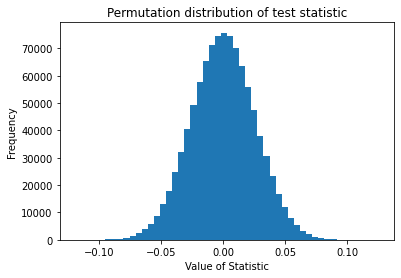

In [22]:
# not fully sure what this means
plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

## How much or how do they deviate from optimal in their (first) thorough exploration(s)?

#### Checking longest 5 bouts of each animal that probably denote thorough exploration and see how much repetition/redundancy/inefficiency is there in the trajectory

B5


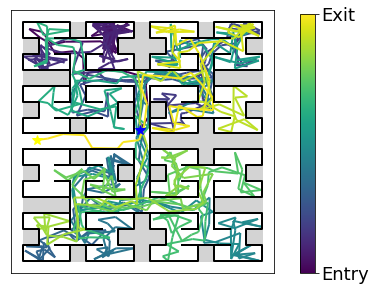

1-longest: traj_len= 518 bout 21 total visited= 103 distinct= 46 ratio= 0.44660194174757284


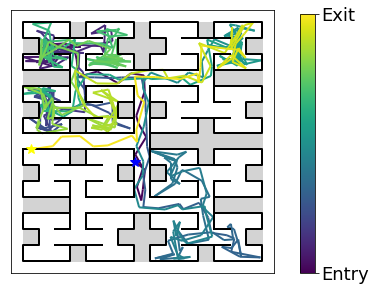

2-longest: traj_len= 366 bout 188 total visited= 78 distinct= 26 ratio= 0.3333333333333333


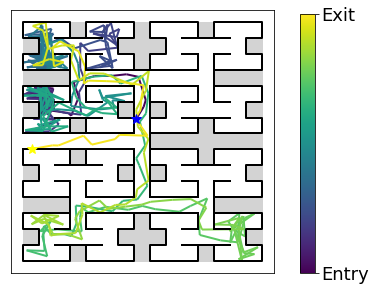

3-longest: traj_len= 324 bout 117 total visited= 78 distinct= 18 ratio= 0.23076923076923078


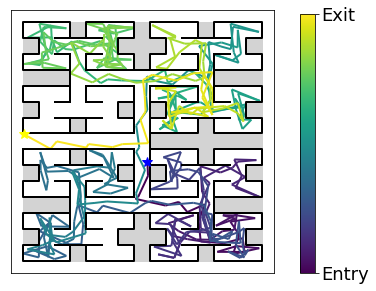

4-longest: traj_len= 318 bout 5 total visited= 55 distinct= 35 ratio= 0.6363636363636364


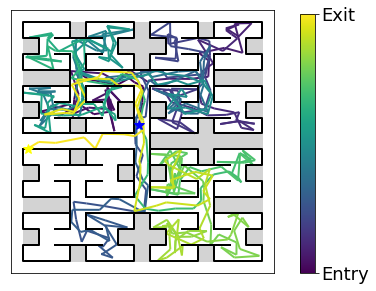

5-longest: traj_len= 316 bout 10 total visited= 57 distinct= 38 ratio= 0.6666666666666666


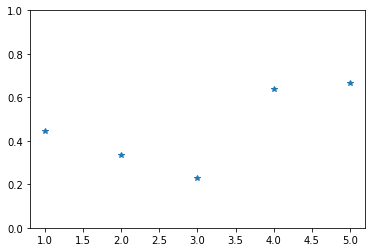


B6


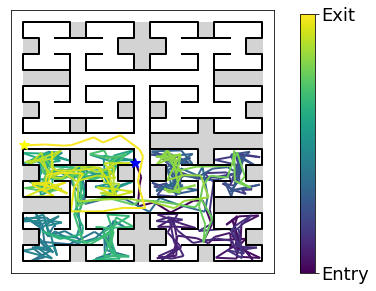

1-longest: traj_len= 432 bout 2 total visited= 107 distinct= 32 ratio= 0.29906542056074764


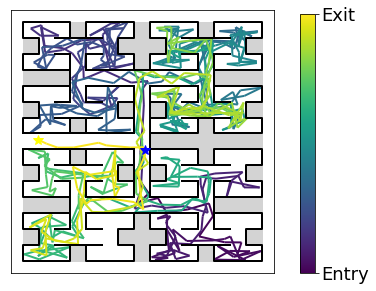

2-longest: traj_len= 414 bout 7 total visited= 80 distinct= 48 ratio= 0.6


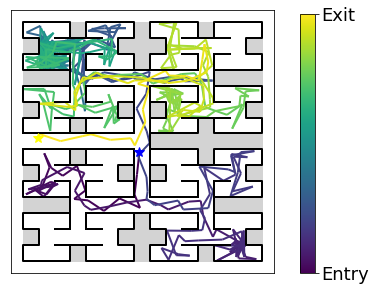

3-longest: traj_len= 414 bout 138 total visited= 70 distinct= 22 ratio= 0.3142857142857143


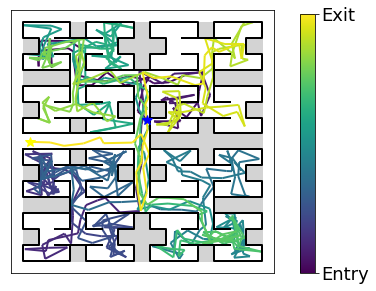

4-longest: traj_len= 406 bout 9 total visited= 70 distinct= 37 ratio= 0.5285714285714286


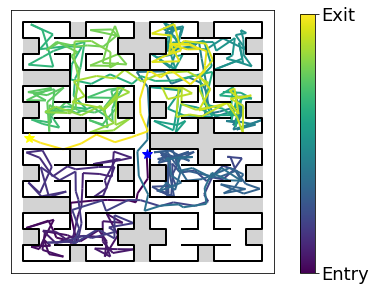

5-longest: traj_len= 382 bout 5 total visited= 80 distinct= 47 ratio= 0.5875


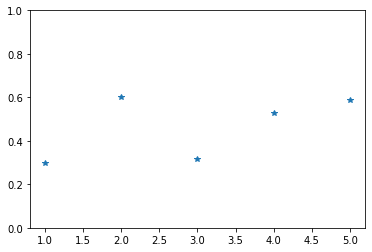


B7


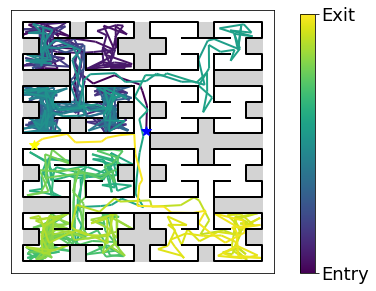

1-longest: traj_len= 736 bout 2 total visited= 177 distinct= 41 ratio= 0.23163841807909605


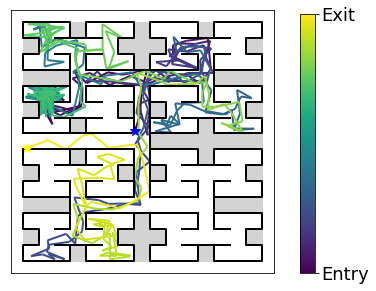

2-longest: traj_len= 334 bout 104 total visited= 60 distinct= 20 ratio= 0.3333333333333333


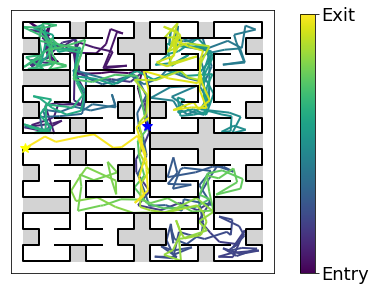

3-longest: traj_len= 316 bout 12 total visited= 52 distinct= 25 ratio= 0.4807692307692308


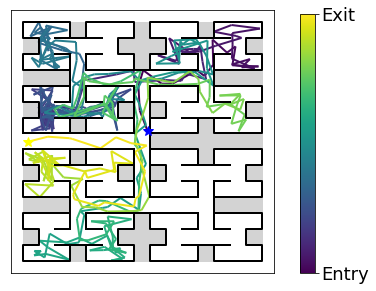

4-longest: traj_len= 292 bout 49 total visited= 42 distinct= 23 ratio= 0.5476190476190477


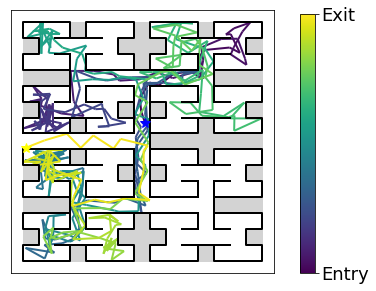

5-longest: traj_len= 268 bout 33 total visited= 47 distinct= 22 ratio= 0.46808510638297873


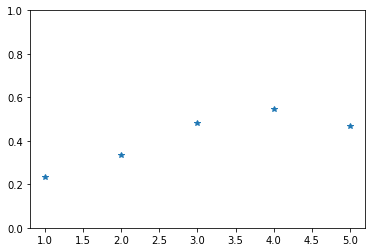


D3


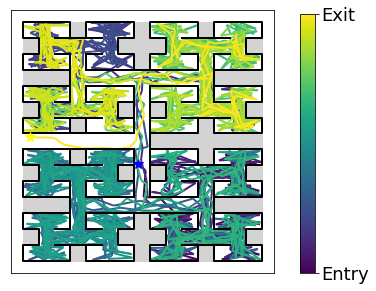

1-longest: traj_len= 1912 bout 1 total visited= 435 distinct= 63 ratio= 0.14482758620689656


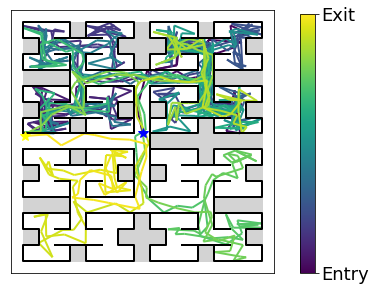

2-longest: traj_len= 576 bout 2 total visited= 100 distinct= 39 ratio= 0.39


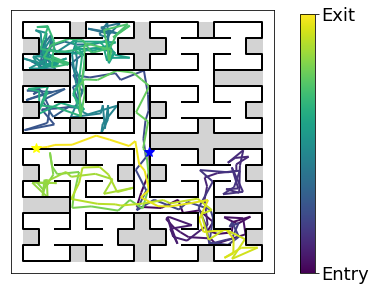

3-longest: traj_len= 232 bout 12 total visited= 43 distinct= 22 ratio= 0.5116279069767442


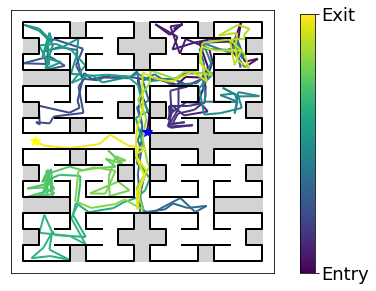

4-longest: traj_len= 194 bout 205 total visited= 29 distinct= 20 ratio= 0.6896551724137931


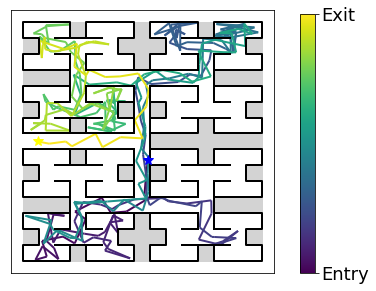

5-longest: traj_len= 188 bout 124 total visited= 35 distinct= 18 ratio= 0.5142857142857142


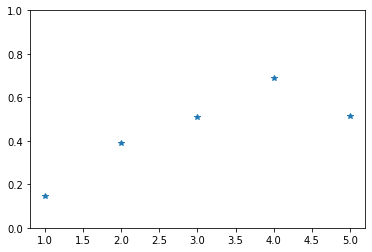


D4


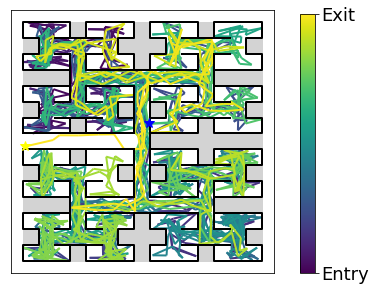

1-longest: traj_len= 1362 bout 8 total visited= 228 distinct= 58 ratio= 0.2543859649122807


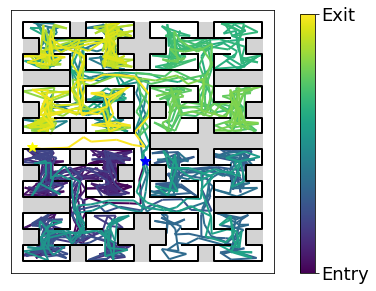

2-longest: traj_len= 1206 bout 4 total visited= 279 distinct= 63 ratio= 0.22580645161290322


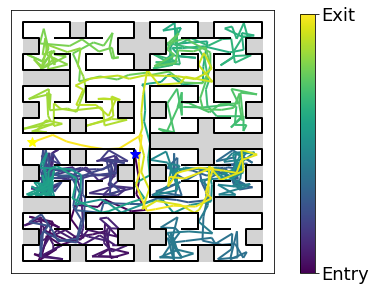

3-longest: traj_len= 474 bout 7 total visited= 87 distinct= 46 ratio= 0.5287356321839081


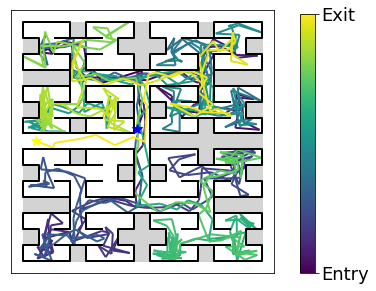

4-longest: traj_len= 458 bout 17 total visited= 70 distinct= 34 ratio= 0.4857142857142857


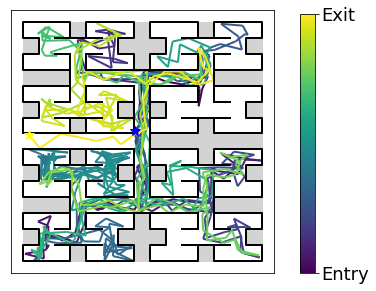

5-longest: traj_len= 386 bout 36 total visited= 59 distinct= 32 ratio= 0.5423728813559322


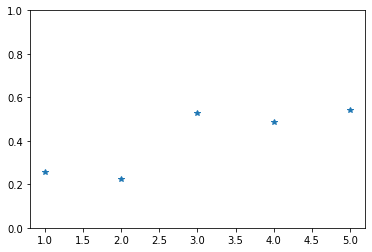

In [39]:
animals = params.UnrewNamesSub[:5]
for sub in animals:
    print(sub)
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
    traj_lens = [(i, len(t)) for i, t in enumerate(tf.no)]
    sorted_traj_lens = sorted(traj_lens, key=lambda x: x[1], reverse=True)
    ratios = []
    for i, (it, _) in enumerate(sorted_traj_lens[:5]):
        nodes = tf.no[it][:, 0]
        plot_trajectory([nodes.tolist()], 'all', figsize=(4,4))
        traj_end_nodes = nodes[np.isin(nodes, lv6_nodes)]
        total_end_nodes_visited = len(traj_end_nodes)
        if total_end_nodes_visited < 15:
            continue
        distinct_end_nodes_visited = len(np.unique(traj_end_nodes))
        ratio_distinct_total = distinct_end_nodes_visited/total_end_nodes_visited
        ratios.append(ratio_distinct_total)
        print(f"{i+1}-longest:", "traj_len=", len(nodes), 
              "bout", it, 
              "total visited=", total_end_nodes_visited, 
              "distinct=", distinct_end_nodes_visited, 
              "ratio=", ratio_distinct_total)
    plt.plot(range(1, len(ratios)+1), ratios, '*')
    plt.ylim([0, 1])
    plt.show()
    print()

In [28]:
### Let's check few thorough trajectories, step by step, and identify the deviation and if there's a pattern.

In [34]:
animals = params.UnrewNamesSub[2:3]
for sub in animals:
    print(sub)
    tf = LoadTrajFromPath(outdata_path + sub + '-tf')
#     print([(i, len(t)) for i, t in enumerate(tf.no)])
    print(tf.no[2][:, 0])

B7
[  0   1   3   8   3   7  15  31  15  32  65  32  66  32  65  32  15  31
  63  31  64  31  63  31  64  31  15   7  16  33  68  33  16  34  70  34
  69  34  70  34  70  34  16  33  68  33  67  33  16  34  70  34  69  34
  16  34  16   7  15  32  65  32  15  31  63  31  15  32  65  32  66  32
  15  31  64  31  63  31  15   7   3   8  18  38  77  38  78  38  18  37
  76  37  75  37  75  37  18  38  77  38  78  38  78  38  77  38  18  37
  76  37  75  37  75  37  18  38  77  38  18   8   3   7  15  32  65  32
  15  31  63  31  15  31  64  31  15  32  65  32  66  32  65  32  66  32
  66  32  15   7   3   8  17  36  73  36  74  36  73  36  73  36  17  36
  17  35  71  35  72  35  17   8  18  38  18  38  77  38  78  38  18  37
  76  37  75  37  18   8   3   7  15  32  65  32  65  32  65  32  15   7
   3   8  17  36  73  36  73  36  17  36  17  35  71  35  72  35  17  36
  17  35  17  35  17   8  18  38  77  38  78  38  18  37  76  37  76  37
  75  37  75  37  18   8  17  36  17  35  71  35

In [8]:
print([ int(i) for i in 
    
    """25  12   5  11  24  49  99  49 100  49  24  50
  24  11   5  12  25  52  25  52 105  52  25  51  25  51  25  51 104  51
 103  51 104  51  25  12   5  11  23  47  96  47  23  48  97  48  23  11
   5  12  25  52 105  52 105  52  25  52  25  51  25  52  25  52  25  52
  25  52 105  52  25  51 104  51  25  51 104  51  25  12  26  54  26  54
 110  54  26  53 108  53  26  53 107  53  26  12  25  51 104  51  25  52
 105  52 106  52  25  51 104  51 103  51 104  51 103  51  25  12  26  53
 107  53  26  12   5   2   6  14"""
       
    .split()])

[25, 12, 5, 11, 24, 49, 99, 49, 100, 49, 24, 50, 24, 11, 5, 12, 25, 52, 25, 52, 105, 52, 25, 51, 25, 51, 25, 51, 104, 51, 103, 51, 104, 51, 25, 12, 5, 11, 23, 47, 96, 47, 23, 48, 97, 48, 23, 11, 5, 12, 25, 52, 105, 52, 105, 52, 25, 52, 25, 51, 25, 52, 25, 52, 25, 52, 25, 52, 105, 52, 25, 51, 104, 51, 25, 51, 104, 51, 25, 12, 26, 54, 26, 54, 110, 54, 26, 53, 108, 53, 26, 53, 107, 53, 26, 12, 25, 51, 104, 51, 25, 52, 105, 52, 106, 52, 25, 51, 104, 51, 103, 51, 104, 51, 103, 51, 25, 12, 26, 53, 107, 53, 26, 12, 5, 2, 6, 14]
